In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import re
import shutil
import time
from datetime import datetime
from datetime import timedelta
pd.set_option('display.max_columns',None)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [134]:
os.getcwd()
os.chdir('C:\\Users\\Administrator\\Desktop\\python data  lab\\test data')

In [135]:
rad_data=pd.read_excel('报警事项列表导出(湖南).xls',parse_dates=True)
rad_data.head()

,客户名称,组织机构代码,信用等级,行业大类,行业小类,客户管理部门,企业出资人经济成分小类,所属集团,所属集团编号,业务模块,...,核查人,核查意见,核查提交时间,审核人,审核意见,审核提交时间,确认人,确认意见,确认提交时间,单位：元(人民币)
0,内蒙古陆海通贸易有限公司,MA0MW5XU-0,14.0,批发业,煤炭及制品批发,公司业务部,私人绝对控股,NaN,NaN,额度审批,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,内蒙古陆海通贸易有限公司,MA0MW5XU-0,14.0,批发业,煤炭及制品批发,公司业务部,私人绝对控股,NaN,NaN,额度审批,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,包头钢铁(集团)有限责任公司,11439255-9,7.0,黑色金属矿采选业,铁矿采选,公司业务部,国有绝对控股,包头钢铁（集团）有限责任公司,JT150000000200500012,传统单笔,...,苏楠,包头钢铁（集团）有限责任公司注册资本金164.27亿元，实际控制人内蒙古自治区人民政府持股占...,2020-06-22 10:10:08.0,王龙,2020年6月17日，包头钢铁（集团）有限责任公司RAD系统出现报警，报警原因为“问题客户新...,2020-06-22 11:11:15.0,郝佳宁,同意解除。,2020-06-24 17:13:37.0,NaN
3,鸣飞伟业技术有限公司,30341216-8,10.0,软件和信息技术服务业,信息技术咨询服务,公司业务部,私人相对控股,NaN,NaN,额度审批,...,李思甜,鸣飞伟业技术有限公司，规模中型，行业类型信息技术咨询服务，在我行无信贷余额（包括小微快贷余额...,2020-05-13 09:45:07.0,王龙,2020年5月10日，我行信贷客户鸣飞伟业技术有限公司出现RAD系统报警，报警原因为“一级分...,2020-05-13 10:42:01.0,郝佳宁,同意解除。,2020-05-19 17:11:41.0,NaN
4,内蒙古大雁矿业集团有限责任公司,70149472-8,10.0,煤炭开采和洗选业,褐煤开采洗选,集团客户部,国有绝对控股,国家能源投资集团有限责任公司,JT010000000200500097,传统单笔,...,孙善忠,内蒙古大雁矿业集团有限责任公司是建行总行级战略性客户国家能源投资集团有限责任公司的二级子公司...,2020-05-13 15:32:59.0,王龙,2020年4月27日，内蒙古大雁矿业集团有限责任公司在RAD系统出现报警，报警原因为“问题客...,2020-05-14 09:30:01.0,郝佳宁,同意解除。,2020-05-22 17:39:29.0,NaN


In [136]:
# rad_data.drop('单位：元(人民币)',axis=1,inplace=True)
rad_data.loc[:,'报警日期']=pd.to_datetime(rad_data.loc[:,'报警日期'])
rad_data.loc[:,'核查提交时间']=pd.to_datetime(rad_data.loc[:,'核查提交时间'])
rad_data.loc[:,'审核提交时间']=pd.to_datetime(rad_data.loc[:,'审核提交时间'])
rad_data.loc[:,'确认提交时间']=pd.to_datetime(rad_data.loc[:,'确认提交时间'])

In [137]:
rad_data.loc[:,'报警日期'].dt.month
rad_data['yearmonth']=rad_data['报警日期'].map(lambda x:str(x.year)+'-'+str(x.month))
rad_data_count=rad_data.groupby(['yearmonth']).count()
rad_data_count

,客户名称,组织机构代码,信用等级,行业大类,行业小类,客户管理部门,企业出资人经济成分小类,所属集团,所属集团编号,业务模块,...,核查人,核查意见,核查提交时间,审核人,审核意见,审核提交时间,确认人,确认意见,确认提交时间,单位：元(人民币)
yearmonth,,,,,,,,,,,,,,,,,,,,,
2017-12,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,1,1,1,0
2018-1,1,1,0,1,1,0,0,1,1,1,...,0,0,0,1,1,1,1,1,1,0
2018-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2018-11,2,2,2,2,2,2,2,2,2,2,...,1,1,2,2,2,2,2,2,2,0
2018-12,10,10,10,10,10,10,9,8,8,10,...,6,6,6,8,8,8,8,8,8,0
2018-3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2018-6,5,5,5,5,5,3,3,4,4,5,...,3,3,3,4,4,4,5,5,5,0
2018-7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2018-8,5,5,5,5,5,5,4,5,5,5,...,4,4,4,4,4,4,5,5,5,0


([<matplotlib.axis.XTick at 0x1fae1f98>,
 <a list of 25 Text xticklabel objects>)

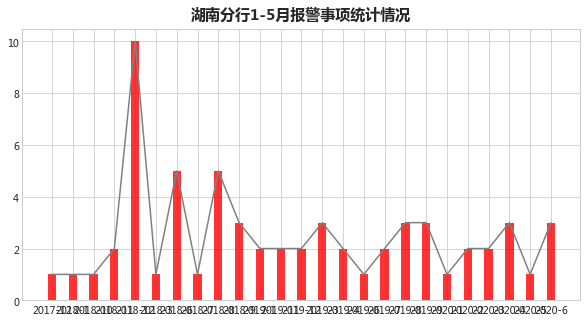

In [138]:
%matplotlib inline
import matplotlib.style as style
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
plt.bar(rad_data_count.index,rad_data_count['客户名称'],align='center',color='red',alpha=0.8, width=0.4)
plt.title('湖南分行1-5月报警事项统计情况',fontsize=15,fontweight='bold',pad=10)
plt.plot(rad_data_count.index,rad_data_count['客户名称'],color='gray')
plt.xticks(rad_data_count.index)

In [177]:
def read_data(excelname):
    os.chdir('C:\\Users\\Administrator\\Desktop\\python data  lab\\test data')
    data_files=os.listdir()
    pattern=re.compile(r'.*'+str(excelname)+'.*')
    data_frame_index=[]
    for index,data_file in enumerate(data_files):
        if  len(pattern.findall(data_file))!=0:
            data_frame_index.append(index)
            if len(data_frame_index)==1:
                df=pd.read_excel(data_file,parse_dates=True)
            else:
                df1=pd.read_excel(data_file,parse_dates=True)
                df=pd.concat([df,df1],axis=0)
    df.loc[:,'报警日期']=pd.to_datetime(df.loc[:,'报警日期'])
    df.loc[:,'核查提交时间']=pd.to_datetime(df.loc[:,'核查提交时间'])
    df.loc[:,'审核提交时间']=pd.to_datetime(df.loc[:,'审核提交时间'])
    df.loc[:,'确认提交时间']=pd.to_datetime(df.loc[:,'确认提交时间'])
    df.drop('单位：元(人民币)',axis=1,inplace=True)
    return df
                     
read_data('报警事项列表导出').head(1)

,客户名称,组织机构代码,信用等级,行业大类,行业小类,客户管理部门,企业出资人经济成分小类,所属集团,所属集团编号,业务模块,...,核查确认权限,核查人,核查意见,核查提交时间,审核人,审核意见,审核提交时间,确认人,确认意见,确认提交时间
0,内蒙古陆海通贸易有限公司,MA0MW5XU-0,14.0,批发业,煤炭及制品批发,公司业务部,私人绝对控股,NaN,NaN,额度审批,...,中国建设银行,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT


In [142]:
df_data=read_data('报警事项列表导出')
df_data['yearmonth']=df_data['报警日期'].map(lambda x:1000*x.year+x.month)
df_data_yearmonth=df_data.groupby('yearmonth').count()

In [143]:
df_data_yearmonth1=df_data_yearmonth.iloc[0:12,:]
df_data_yearmonth2=df_data_yearmonth.iloc[12:,:]

In [144]:
df_data_yearmonth2=df_data_yearmonth2.reset_index()
df_data_yearmonth2.rename(columns={'客户名称':'客户名称同期'},inplace=True)
df_data_yearmonth1=df_data_yearmonth1.reset_index()
df_compared=pd.concat([df_data_yearmonth1['客户名称'],df_data_yearmonth2['客户名称同期']],axis=1)

In [145]:
df_compared.fillna(0,inplace=True)
df_compared.columns.names=['序列']
df_compared['tt']=df_compared.iloc[:,1]/df_compared.iloc[:,0]-1
df_compared

序列,客户名称,客户名称同期,tt
0,1.0,2,1.000000
1,1.0,1,0.000000
2,1.0,2,1.000000
3,5.0,3,-0.400000
4,1.0,3,2.000000
5,5.0,2,-0.600000
6,3.0,2,-0.333333
7,1.0,1,0.000000
8,2.0,2,0.000000
9,10.0,2,-0.800000


In [146]:
# df_compared['tt']=df_compared['tt'].apply(lambda x: format(x,'.2%'))
df_compared.dtypes

序列
客户名称      float64
客户名称同期      int64
tt        float64
dtype: object

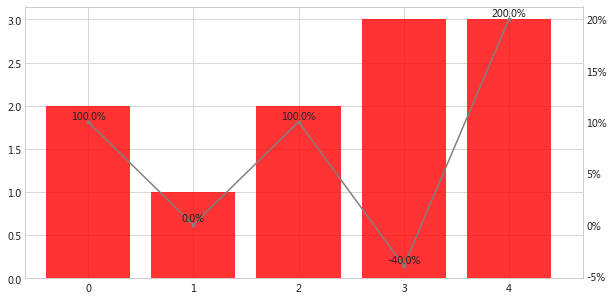

In [147]:
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
fig,ax1=plt.subplots(figsize=(10,5))
ax1.bar(df_compared.index[:5],df_compared['客户名称同期'][:5],align='center',color='red',alpha=0.8)
ax1.set_xlim(-0.6,4.7)
ax2=ax1.twinx()
ax2.plot(df_compared.index[:5],df_compared['tt'][:5],'.-',color='gray')
ax2.grid()
def to_percent(temp,position):
    return '%1.0f'%(10*temp)+'%'
ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))
for a,b in zip(df_compared.index[:5],df_compared['tt'][:5]):
    ax2.text(a,b, '{}%'.format(round(b*100,2)),ha='center',va='bottom',fontsize=10)
# for a,b in zip(df_compared.index[:5],df_compared['客户名称同期'][:5]):
#     ax1.text(a,b, b,ha='right',va='bottom',fontsize=10)

In [2]:
d1=np.random.normal(0,1,30)
d2=np.random.randint(0,10,30)
x_value=range(1,31)
df1=pd.DataFrame({'nornal_rand':list(d1),'int_rand':list(d2),})
print(df1.shape[0])
normal_value=df1.loc[:,'int_rand']

30


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


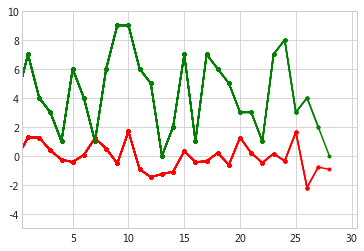

In [9]:
'''生成动图'''
%matplotlib inline
import matplotlib.style as style
import matplotlib.animation as ani
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
fig=plt.figure()
plt.xlim(0.5,30.5)
plt.ylim(-5,10)
# plt.plot(df1.index[:12],normal_value[:12],'o-')
def buildmebarchart(i):
    index_value=df1.index
    normal_value=df1.loc[:,'nornal_rand']
    int_value=df1.loc[:,'int_rand']
    plt.plot(df1.index[:i],normal_value[:i],'.-',color='red')
    plt.plot(df1.index[:i],int_value[:i],'.-',color='green')
    

animator=ani.FuncAnimation(fig,
                           buildmebarchart,
                           frames=30,
                           interval=20)
animator.save('2.gif')
plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


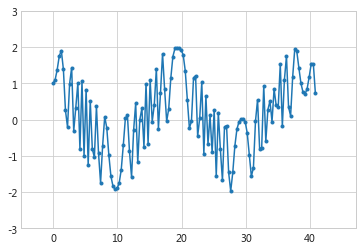

In [120]:
fig, ax = plt.subplots() 
x, y= [], [] 
line, = plt.plot([], [], '.-') 
def init(): 
    ax.set_xlim(-5, 15*np.pi) 
    ax.set_ylim(-3, 3) 
    return line 

def update(step): 
    x.append(step) 
    y.append(np.cos(step/3)+np.sin(step**2)) 
    line.set_data(x, y) 
    return line

ani = FuncAnimation(fig, update, frames=np.linspace(0, 13*np.pi, 128), init_func=init,interval=20) 
ani.save('1.gif',writer='imagemagick')
plt.show()

In [71]:
'''找到指定数据位置并读取数据'''
path=os.chdir('C:\\Users\\Administrator\\Desktop\\python data  lab\\test data')
df=pd.read_csv('test.csv',sep='\t')

In [72]:
'''判断数据类型并做相关清理   注意：to_datetime中的format仅为指定数据的具体年月日格式 不是转换后的格式'''
df.loc[:,'批复日期']=pd.to_datetime(df.loc[:,'批复日期']).dt.normalize() #去掉时间序列中的时间数据
df.loc[df['申报授信/明细支用金额（合人民币）'].isnull(),:]

,批复日期,审批机构所属一级行,申报授信/明细支用金额（合人民币）


In [87]:
'''对时间序列数据进行整合 添加 年-月 以及 年数据   注意：to_period仅针对index为时间日期型数据'''
df.loc[:,'审批年']=pd.to_datetime(df.loc[:,'批复日期']).dt.year #提取对应年
df.loc[:,'审批年月']=df.loc[:,'批复日期'].apply(lambda x:x.strftime('%Y-%m')) #提取对应年月
df=df.rename(columns={'审批年':'批复年','审批年月':'批复年月'})
df.head()

,批复日期,审批机构所属一级行,申报授信/明细支用金额（合人民币）,批复年,批复年月,批复年,批复年月
0,2019-01-03,建行苏州分行,1950000.0,2019,2019-01,2019,2019-01
1,2019-01-07,建行江苏省分行,34000000.0,2019,2019-01,2019,2019-01
2,2019-01-07,建行北京市分行,100000000.0,2019,2019-01,2019,2019-01
3,2019-01-07,建行黑龙江省分行,58000000.0,2019,2019-01,2019,2019-01
4,2019-01-14,建行重庆市分行,20000000.0,2019,2019-01,2019,2019-01


In [108]:
'''对数据进行整合处理'''
df1=df.loc[:,['审批机构所属一级行','申报授信/明细支用金额（合人民币）']].groupby('审批机构所属一级行').aggregate(['count','sum'])
df1_count=pd.DataFrame(df1.loc[:,('申报授信/明细支用金额（合人民币）','count')])
df1_sum=pd.DataFrame(df1.loc[:,('申报授信/明细支用金额（合人民币）','sum')])
df1.head(5)

申报授信/明细支用金额（合人民币）              
                       count           sum
审批机构所属一级行                                 
中国建设银行本级                1772  1.560236e+13
建行上海市分行                 1267  5.395305e+11
建行云南省分行                  229  8.853346e+10
建行内蒙古自治区分行               215  6.482198e+10
建行北京市分行                 1751  1.033551e+12

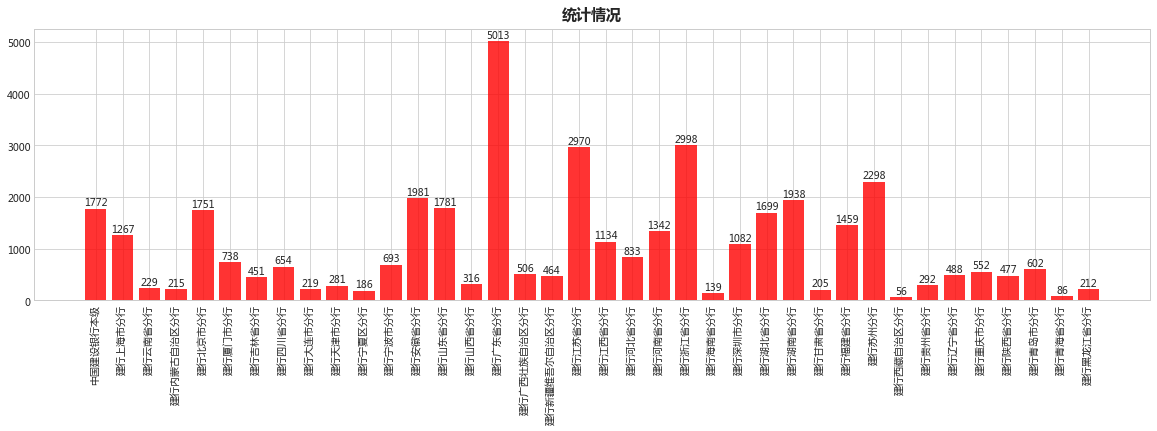

In [159]:
'''绘制柱形图 并在柱形图上标注 文本'''
%matplotlib inline
import matplotlib.style as style
import matplotlib.animation as ani
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
fig=plt.figure(figsize=(20,5))
plt.bar(df1_count.index,df1_count.loc[:,('申报授信/明细支用金额（合人民币）','count')],align='center',color='red',alpha=0.8, width=0.8)
plt.xticks(rotation=90) # x轴旋转90度
plt.title('统计情况',fontsize=15,fontweight='bold',pad=10) #添加标题
for a,b in zip(df1_count.index,df1_count.loc[:,('申报授信/明细支用金额（合人民币）','count')]): #柱形图添加文字
    plt.text(a, b ,'%.0f'%b,ha='center',va='bottom',fontsize=10)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


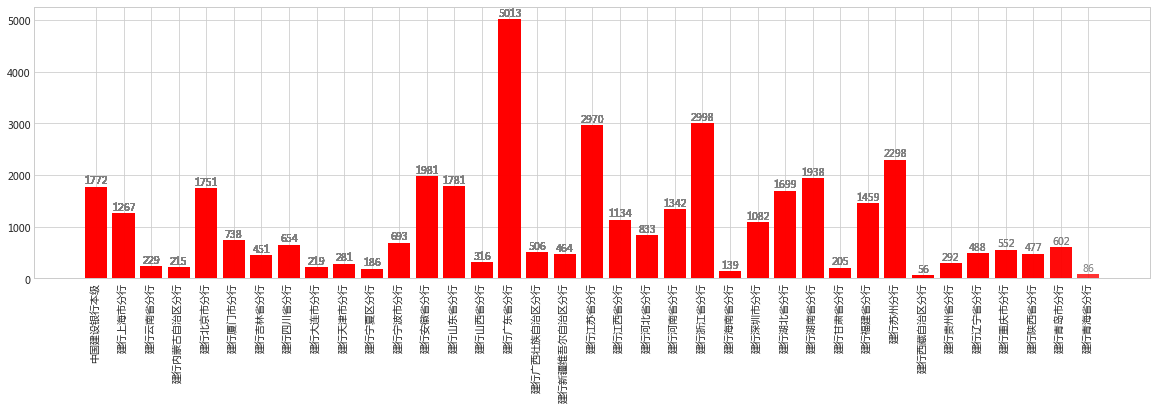

In [174]:
'''生成动图'''
%matplotlib inline
import matplotlib.style as style
import matplotlib.animation as ani
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
fig=plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

def buildmebarchart(i):
    index_value=df1_count.index
    normal_value=df1_count.loc[:,('申报授信/明细支用金额（合人民币）','count')]
    plt.bar(index_value[:i],normal_value[:i],align='center',color='red',alpha=0.8, width=0.8)
    for a,b in zip(index_value[:i],normal_value[:i]):       #柱形图添加文字
        plt.text(a, b ,'%.0f'%b,ha='center',va='bottom',fontsize=10,color='gray')

animator=ani.FuncAnimation(fig,
                           buildmebarchart,
                           frames=len(list(df1_count.index)),
                           interval=20)
animator.save('3.gif')
plt.show()

In [2]:
'''引入万得数据api端口'''
from WindPy import *
w.start()
w.isconnected()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [3]:
'''多维数据合并 '''
date_list=['20161231','20171231','20181231','20191231']
'''首个数据'''
data_value=w.wss("002080.SZ,600458.SH,300004.SZ,000836.SZ,207407.SEE", 
  "netprofitmargin,grossprofitmargin,cogstosales","rptDate="+date_list[0],usedf=True)
df1=data_value[1]
df1['报告期']=datetime.strptime(date_list[0],'%Y%m%d')
for date in date_list[1:]:
    data_value=w.wss("002080.SZ,600458.SH,300004.SZ,000836.SZ,207407.SEE", 
      "netprofitmargin,grossprofitmargin,cogstosales","rptDate="+date,usedf=True)
    df2=data_value[1]
    df2['报告期']=datetime.strptime(date,'%Y%m%d')
    df1=pd.concat([df1,df2])

In [4]:
'''数据分组统计'''
df1.reset_index(inplace=True)
df1.rename(columns={'index':'股票代码'},inplace=True)
calulate_data=df1.dropna().groupby('报告期').mean()

In [5]:
display('calulate_data','calulate_data')

,NETPROFITMARGIN,GROSSPROFITMARGIN,COGSTOSALES
报告期,,,
2016-12-31,5.107050,21.438250,78.561750
2017-12-31,4.452800,21.590525,78.409475
2018-12-31,-25.026625,21.340050,78.659950
2019-12-31,4.182175,22.345550,77.654450
,NETPROFITMARGIN,GROSSPROFITMARGIN,COGSTOSALES
报告期,,,
2016-12-31,5.107050,21.438250,78.561750
2017-12-31,4.452800,21.590525,78.409475
2018-12-31,-25.026625,21.340050,78.659950


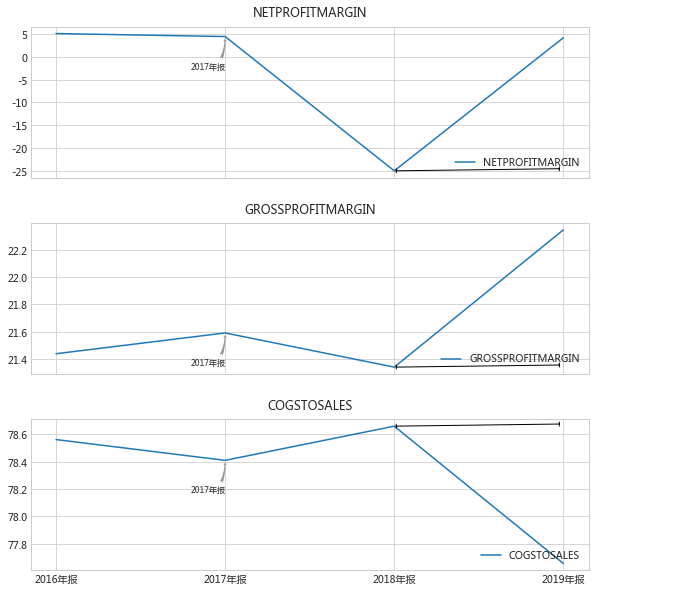

In [198]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
fig,ax=plt.subplots(3,1,sharex='col',figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
annual_list=[]
for year in calulate_data.index.year:
    annual=f'{year}年报'
    annual_list.append(annual)
for i in range(3):
    ax[i].plot(annual_list,calulate_data[calulate_data.columns[i]],label=calulate_data.columns[i])
    ax[i].set_title(calulate_data.columns[i],pad=10)
    ax[i].legend(loc='lower right')
    ax[i].annotate('2017年报',
                   xy=('2017年报',calulate_data.loc['2017-12-31',calulate_data.columns[i]]),
                   xycoords='data',
                   xytext=(0,-30),
                   textcoords='offset points',
                   size=8,ha='right',va='center',
                   arrowprops=dict(arrowstyle='fancy',fc='0.6',ec='none',connectionstyle='angle3,angleA=0,angleB=90')
    )
    ax[i].annotate('                                           ',
                   xy=('2018年报',calulate_data.loc['2018-12-31',calulate_data.columns[i]]),
                   xycoords='data',
                   xytext=('2019年报',calulate_data.loc['2018-12-31',calulate_data.columns[i]]),
                   textcoords='data',
                   arrowprops={'arrowstyle':'| - |,widthA=0.2,widthB=0.2'}
    )
    